#  Hypothyroid prediction using Light GBM classifier 

In [1]:
import pandas as pd
import numpy as np

In [2]:
cd F:\Thyroid Final

F:\Thyroid Final


In [3]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

file_handler = open("hypothyroid.csv", "r") 
df = pd.read_csv(file_handler, sep = ",") 
file_handler.close() 
df.head(2)

,class,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19,y,1.13,y,17,n,?


In [4]:
df.loc[df['Age'] == '455', 'Age'] = '45'

In [5]:
df.dropna(inplace=True)
df.replace(to_replace='?', inplace=True)
df.dropna(inplace=True)
df = df.replace(to_replace={'f':0,'t':1, 'y':1, 'n':0,'M':0,'F':1})
df = df.replace(to_replace={'?':True})
df.dropna(inplace=True)


In [6]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["class"] = lb_make.fit_transform(df["class"])

x=df.iloc[:,[1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19]]
y=df["class"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [7]:
import lightgbm as ltb
model = ltb.LGBMClassifier(boosting_type='dart',max_depth=10,num_leaves=90,binary="log loss",learning_rate=0.199,
                           objective="cross_entropy",extra_trees="True",tree_learner="data",metric="binary_logloss")
model.fit(x_train, y_train)


LGBMClassifier(binary='log loss', boosting_type='dart', class_weight=None,
               colsample_bytree=1.0, extra_trees='True',
               importance_type='split', learning_rate=0.199, max_depth=10,
               metric='binary_logloss', min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=90, objective='cross_entropy',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               tree_learner='data')

In [8]:
    from sklearn import metrics

    expected_y  = y_test
    y_pred= model.predict(x_test)
    
    # summarize the fit of the model
    print(); print(metrics.classification_report(expected_y, y_pred))
    print(); print(metrics.confusion_matrix(expected_y,y_pred))
    print("Accuracy:  ",metrics.accuracy_score(expected_y, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.89      0.88        55
           1       1.00      0.99      0.99      1211

    accuracy                           0.99      1266
   macro avg       0.93      0.94      0.93      1266
weighted avg       0.99      0.99      0.99      1266


[[  49    6]
 [   8 1203]]
Accuracy:   0.9889415481832543


In [9]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()


1    1211
0      55
Name: class, dtype: int64

In [10]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()


0.9565560821484992

In [11]:
# calculate the percentage of zeros
1 - y_test.mean()


0.04344391785150081

In [12]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

1    0.956556
Name: class, dtype: float64

In [13]:
print("classification_error")
print(1 - metrics.accuracy_score(y_test, y_pred))

classification_error
0.011058451816745696


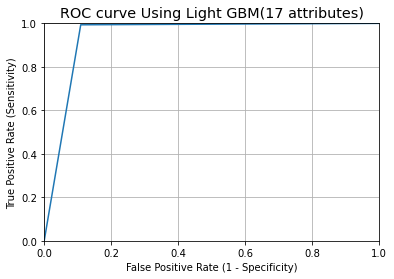

In [14]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve Using Light GBM(17 attributes)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [15]:
# calculate accuracy
from sklearn import metrics
print("ACCURACY:")
print(metrics.accuracy_score(y_test, y_pred))


ACCURACY:
0.9889415481832543


In [16]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("classification_error")
print(1 - metrics.accuracy_score(y_test, y_pred))
print("sensitivity")
print(metrics.recall_score(y_test, y_pred))
print("True Positive Rate")
specificity = TN / (TN + FP)

print(specificity)
print("precision")
print(metrics.precision_score(y_test, y_pred))
print("roc_auc_score")
print(metrics.roc_auc_score(y_test, y_pred))
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)

[[  49    6]
 [   8 1203]]
classification_error
0.011058451816745696
sensitivity
0.9933938893476466
True Positive Rate
0.8909090909090909
precision
0.9950372208436724
roc_auc_score
0.9421514901283687
F-Measure: 0.994


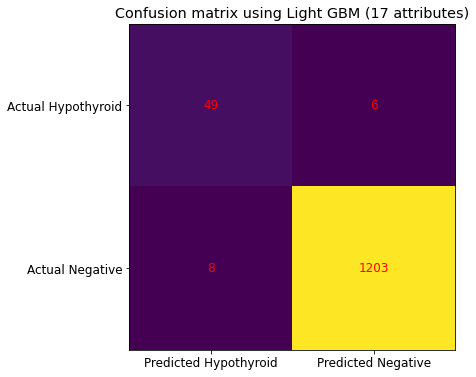

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(x_test))
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Hypothyroid', 'Predicted Negative'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Hypothyroid', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.title("Confusion matrix using Light GBM (17 attributes)")
plt.show()


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
cv_results


array([0.97894737, 0.99473684, 0.95789474, 0.97368421, 0.98421053,
       0.98421053, 0.98421053, 0.99470899, 0.98941799, 0.97883598])